In [1]:
!pip install -q diffusers

In [2]:
# imports
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import numpy as np
from diffusers import UNet2DModel
from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

c:\Users\user\OneDrive\Desktop\ALL\Code\Coding project\genai\Gen-AI-DL\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [3]:
# pixel art dataset loader.
class PixelArtDataset(Dataset):
    def __init__(self, images_path, labels_path, transform=None):
        self.images = np.load(images_path)
        self.labels = np.load(labels_path)
        self.transform = transform

        # Data Validation (more comprehensive)
        if self.images.shape[1:] != (16, 16, 3):  # Check image size (16x16x3)
            raise ValueError(f"Images must be 16x16x3, but are {self.images.shape}")
        if self.labels.ndim != 2 or self.labels.shape[1] != 5:  # Check label shape
            raise ValueError(f"Labels must be a 2D array with 5 elements per row, but are {self.labels.shape}")
        if self.images.shape[0] != self.labels.shape[0]:
            raise ValueError("Number of images and labels must match")
        if self.images.dtype != np.uint8:  # Check data type. Assuming your images are 8-bit
            raise TypeError(f"Images must be uint8, but are {self.images.dtype}. Convert if necessary")
        if self.labels.dtype != np.float64:  # Check data type. Assuming your labels are float32
            raise TypeError(f"Labels must be float32, but are {self.labels.dtype}. Convert if necessary")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # Convert image to tensor, normalize, and add channel dimension
        image = torch.from_numpy(image).float() / 255.0  # Normalize to [0, 1]

        # No need to unsqueeze for RGB images:
        image = image.permute(2, 0, 1) # Change from HxWx3 to 3xHxW (CHW)

        if self.transform:
            image = self.transform(image)

        label = torch.from_numpy(label).float()

        return image, label

In [15]:
images_path = "../npy_dataset/sprites.npy"
labels_path = "../npy_dataset/sprites_labels.npy"

transform = transforms.Compose([

])

dataset = PixelArtDataset(images_path, labels_path, transform=transform)

# Create a DataLoader for batching and shuffling
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)  # Adjust batch size as needed

Input shape: torch.Size([8, 3, 16, 16])


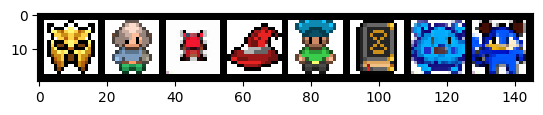

In [16]:
import torch
import torchvision
import matplotlib.pyplot as plt

# ... (Your dataset and dataloader setup)

x, y = next(iter(dataloader))
print('Input shape:', x.shape)  # Should be (batch_size, channels, height, width)
# print('Labels:', y)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # CHW to HWC
    plt.show()

# Display the grid of images (all images in the batch)
imshow(torchvision.utils.make_grid(x))